In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import datetime
#jupyter notebook --notebook-dir=c:\xampp\htdocs\quantumswitch

In [2]:
file = open('quantumswitchdata.txt', "r")
rawjson = file.read()
quantumswitchdata = json.loads(rawjson)
file.close()

In [3]:
frequency = np.array(quantumswitchdata['f'])
devicenames = quantumswitchdata['devicenames']
S11complex = {}
S21complex = {}
S22complex = {}
S12complex = {}

S11logmag = {}
S21logmag = {}
S22logmag = {}
S12logmag = {}

S11phase = {}
S21phase = {}
S12phase = {}
S22phase = {}

for portnumber in range(1,10):
    S11complex[devicenames[portnumber-1]] = np.array(quantumswitchdata['S11port'  + str(portnumber) + 'real']) + 1j*np.array(quantumswitchdata['S11port'  + str(portnumber) + 'imag'])
    S21complex[devicenames[portnumber-1]] = np.array(quantumswitchdata['S21port'  + str(portnumber) + 'real']) + 1j*np.array(quantumswitchdata['S21port'  + str(portnumber) + 'imag'])
    S22complex[devicenames[portnumber-1]] = np.array(quantumswitchdata['S22port'  + str(portnumber) + 'real']) + 1j*np.array(quantumswitchdata['S22port'  + str(portnumber) + 'imag'])
    S12complex[devicenames[portnumber-1]] = np.array(quantumswitchdata['S11port'  + str(portnumber) + 'real']) + 1j*np.array(quantumswitchdata['S12port'  + str(portnumber) + 'imag'])

    S11logmag[devicenames[portnumber-1]]  = 10*np.log10(np.abs(S11complex[devicenames[portnumber-1]])**2)
    S21logmag[devicenames[portnumber-1]]  = 10*np.log10(np.abs(S21complex[devicenames[portnumber-1]])**2)
    S22logmag[devicenames[portnumber-1]]  = 10*np.log10(np.abs(S22complex[devicenames[portnumber-1]])**2)
    S12logmag[devicenames[portnumber-1]]  = 10*np.log10(np.abs(S12complex[devicenames[portnumber-1]])**2)

    S11phase[devicenames[portnumber-1]] = np.unwrap(np.angle(S11complex[devicenames[portnumber-1]],deg=True))
    S21phase[devicenames[portnumber-1]] = np.unwrap(np.angle(S21complex[devicenames[portnumber-1]],deg=True))

In [5]:
quantumswitchdata['']

{'dataurl': 'https://github.com/lafefspietz/quantumswitch/blob/main/quantumswitchdata.txt',
 'ipynb': 'https://github.com/lafefspietz/quantumswitch/blob/main/quantumswitch.ipynb',
 'email': 'lafe.f.spietz@nist.gov',
 'author': 'Lafe Spietz',
 'license': 'Public Domain',
 'repository': 'https://github.com/lafefspietz/quantumswitch',
 'location': 'Boulder, Co, USA',
 'organization': 'NIST',
 'fridge': 'XLD Dilution refrigerator in wing 3 of Building 1 at NIST, Boulder',
 'localdata': 'grumpy\\lafe\\MEMS switches\\data\\XLD_calibration_fall_2024',
 'experiment': 'SOLT calibration with version 1 of quantum switch and superconducting thru chip',
 'startdatetime': 'Thu Nov 14 09:42:25 2024',
 'starttimestamp': 1731602545,
 'f': [4000000000.0,
  4004004004.0,
  4008008008.01,
  4012012012.01,
  4016016016.02,
  4020020020.02,
  4024024024.02,
  4028028028.03,
  4032032032.03,
  4036036036.04,
  4040040040.04,
  4044044044.04,
  4048048048.05,
  4052052052.05,
  4056056056.06,
  4060060060.06,

(4.0, 8.0)

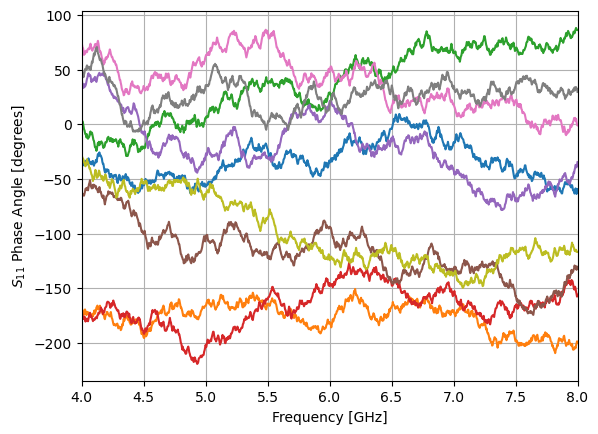

In [4]:
plt.plot(frequency/1e9,S11phase[devicenames[0]])
plt.plot(frequency/1e9,S11phase[devicenames[1]])
plt.plot(frequency/1e9,S11phase[devicenames[2]])
plt.plot(frequency/1e9,S11phase[devicenames[3]])
plt.plot(frequency/1e9,S11phase[devicenames[4]])
plt.plot(frequency/1e9,S11phase[devicenames[5]])
plt.plot(frequency/1e9,S11phase[devicenames[6]])
plt.plot(frequency/1e9,S11phase[devicenames[7]])
plt.plot(frequency/1e9,S11phase[devicenames[8]])

plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ Phase Angle [degrees]')
#plt.ylim((-60,0))
plt.xlim((4,8))
#plt.legend(['$|S_{11}|^2$','$|S_{22}|^2$','$|S_{21}|^2$','$|S_{12}|^2$'])

(4.0, 8.0)

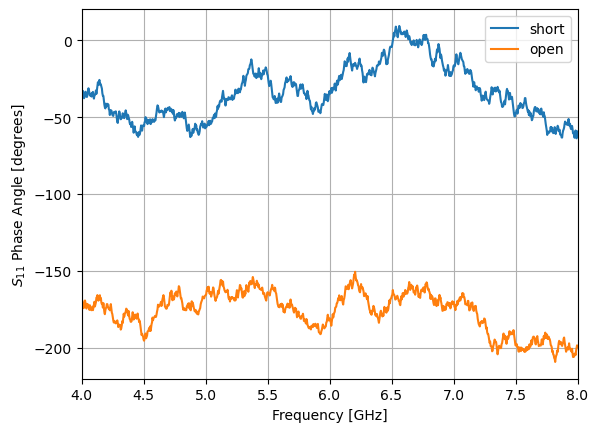

In [15]:
plt.plot(frequency/1e9,S11phase[devicenames[0]])
plt.plot(frequency/1e9,S11phase[devicenames[1]])

plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ Phase Angle [degrees]')
#plt.ylim((-60,0))
plt.legend(['short','open'])
plt.xlim((4,8))

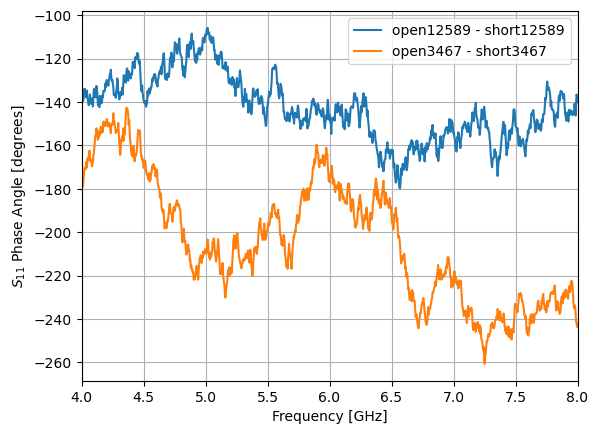

In [12]:
plt.plot(frequency/1e9,S11phase[devicenames[1]]- S11phase[devicenames[0]])
plt.plot(frequency/1e9,S11phase[devicenames[3]]- S11phase[devicenames[2]])

plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ Phase Angle [degrees]')

#plt.ylim((-60,0))
plt.xlim((4,8))
#plt.title('')
plt.legend([devicenames[1] + " - "  + devicenames[0],devicenames[3] + " - "  + devicenames[2]])

(6.0, 7.0)

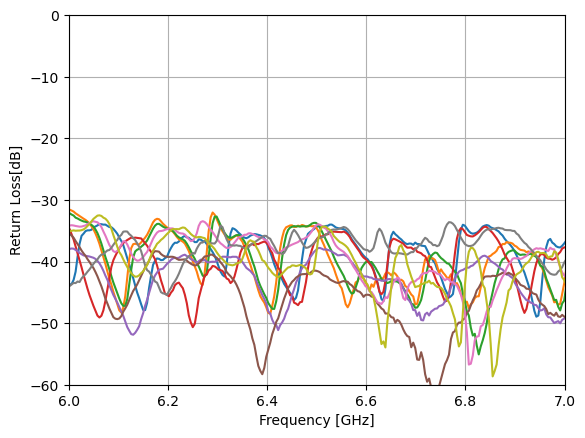

In [13]:
plt.plot(frequency/1e9,S11logmag[devicenames[0]])
plt.plot(frequency/1e9,S11logmag[devicenames[1]])
plt.plot(frequency/1e9,S11logmag[devicenames[2]])
plt.plot(frequency/1e9,S11logmag[devicenames[3]])
plt.plot(frequency/1e9,S11logmag[devicenames[4]])
plt.plot(frequency/1e9,S11logmag[devicenames[5]])
plt.plot(frequency/1e9,S11logmag[devicenames[6]])
plt.plot(frequency/1e9,S11logmag[devicenames[7]])
plt.plot(frequency/1e9,S11logmag[devicenames[8]])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('Return Loss[dB]')
plt.ylim((-60,0))
plt.xlim((6,7))

(4.0, 8.0)

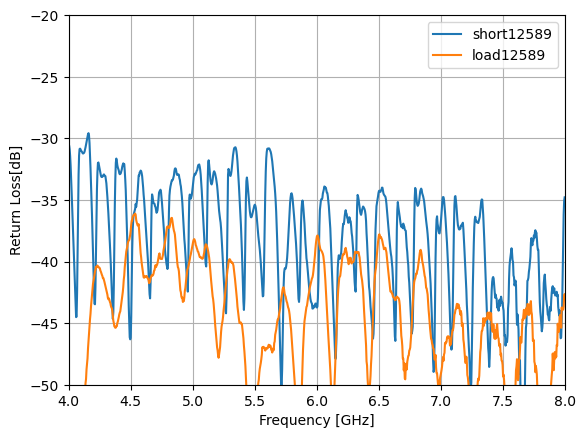

In [28]:
plt.plot(frequency/1e9,S11logmag[devicenames[0]])
plt.plot(frequency/1e9,S11logmag[devicenames[4]])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('Return Loss[dB]')
plt.legend(['short12589','load12589'])
plt.ylim((-50,-20))
plt.xlim((4,8))

(4.0, 8.0)

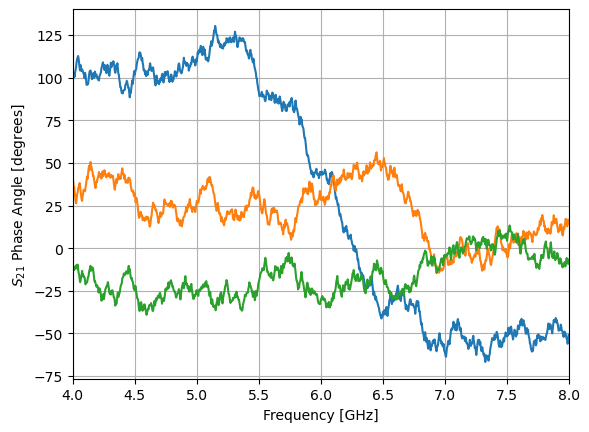

In [6]:
plt.plot(frequency/1e9,S21phase[devicenames[6]])
plt.plot(frequency/1e9,S21phase[devicenames[7]])
plt.plot(frequency/1e9,S21phase[devicenames[8]])

plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{21}$ Phase Angle [degrees]')
#plt.ylim((-60,0))
plt.xlim((4,8))

(6.0, 7.0)

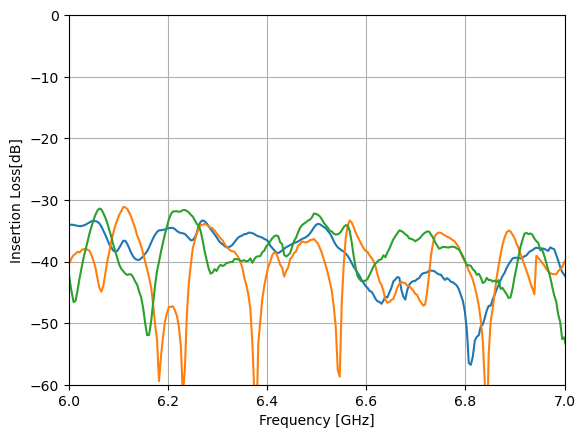

In [14]:
plt.plot(frequency/1e9,S22logmag[devicenames[6]])
plt.plot(frequency/1e9,S22logmag[devicenames[7]])
plt.plot(frequency/1e9,S22logmag[devicenames[8]])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('Insertion Loss[dB]')
plt.ylim((-60,0))
plt.xlim((6,7))

(4.0, 8.0)

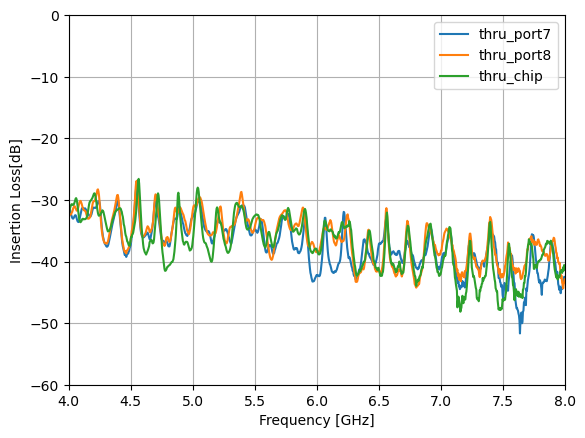

In [26]:
plt.plot(frequency/1e9,S21logmag[devicenames[6]])
plt.plot(frequency/1e9,S21logmag[devicenames[7]])
plt.plot(frequency/1e9,S21logmag[devicenames[8]])

plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('Insertion Loss[dB]')
plt.legend(['thru_port7','thru_port8','thru_chip'])
plt.ylim((-60,0))
plt.xlim((4,8))

(4.0, 8.0)

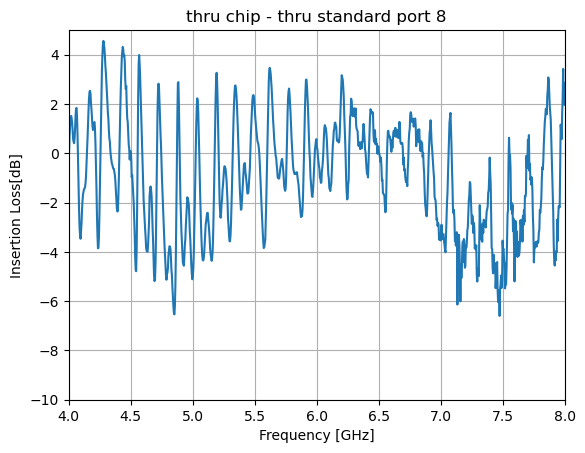

In [31]:
plt.plot(frequency/1e9,S21logmag[devicenames[8]] - S21logmag[devicenames[7]])

plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('Insertion Loss[dB]')
plt.title('thru chip - thru standard port 8')
plt.ylim((-10,5))
plt.xlim((4,8))